In [32]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn
import random

import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel, ldamodel

from topic_modeler import TopicModeler

random.seed(123)
pd.set_option('display.max_colwidth', None)

# Table of Contents

* [Model Search (LDA)](http://localhost:8888/notebooks/topic_modeling.ipynb#Model-Search)
    * [Begin with a small corpus, and unigrams](http://localhost:8888/notebooks/topic_modeling.ipynb#Begin-with-a-small-corpus,-and-unigrams)
    * [Compare to n-grams (small corpus)](http://localhost:8888/notebooks/topic_modeling.ipynb#Compare-to-ngrams-(small-dataset))
    * [Increase size of corpus used for fitting](http://localhost:8888/notebooks/topic_modeling.ipynb#Increase-the-size-of-the-corpus-used-for-fitting)
    * [Fit model on complete corpus](http://localhost:8888/notebooks/topic_modeling.ipynb#Fit-model-on-complete-corpus)
* [Explore selected model](http://localhost:8888/notebooks/topic_modeling.ipynb#Explore-selected-model)
    * [Visualization](http://localhost:8888/notebooks/topic_modeling.ipynb#Visualization)
* [Alternative Approach: doc2vec](http://localhost:8888/notebooks/topic_modeling.ipynb#Alternative-Approach:-doc2vec)

# Model Search

To start with, we will explore fitting latent dirichlet allocation on a small dataset. Later, we'll fit the models on larger datasets and compare the coherence (we expect it to increase with the dataset size, at least up to a point).

## Begin with a small corpus, and unigrams

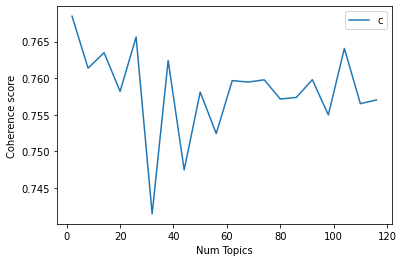

In [25]:
mod = TopicModeler('preprocessed_input/preprocessed_input_10k_unigrams.json')
mod.set_texts()
mod.set_dictionary()
mod.set_corpus()

start = 2; stop = 120; step = 6
model_list, coherence_values = mod.optimal_model_search(start, stop, step)

mod.plot_model_search_results(coherence_values, start, stop, step)

The coherence value is jumping around. Note the y-axis scale (these differences are very small).

## Compare to ngrams (small dataset)

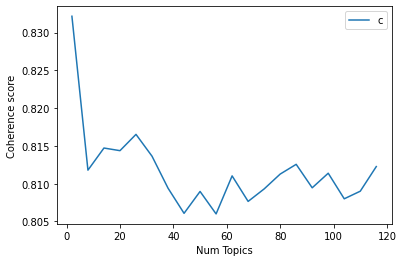

In [26]:
model_list, coherence_values = mod.optimal_model_search(start,stop,step)

mod.plot_model_search_results(coherence_values, start, stop, step)

Overall, coherence is significantly improved when switching from unigrams to n-grams (as found with the "noun chunks" feature of the Spacy library; mostly these are bi/trigrams). However, the model seems to be converging to an optimum of a single topic. 

## Increase the size of the corpus used for fitting

Next, we re-fit the unigram and ngrams models on a larger dataset.

Results of model search on unigrams:


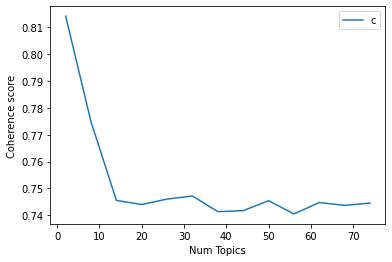

Results of model search on ngrams:


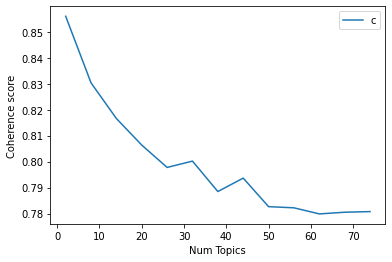

In [48]:
mod1 = TopicModeler('preprocessed_input/preprocessed_input_250k_unigrams.json')
mod1.set_texts()
mod1.set_dictionary()
mod1.set_corpus()
start = 2; stop=80; step=6
model_list_unigrams, coherence_values = mod1.optimal_model_search(start,stop,step)
print('Results of model search on unigrams:')
mod1.plot_model_search_results(coherence_values, start, stop, step)

mod2 = TopicModeler('preprocessed_input/preprocessed_input_250k_ngrams.json')
mod2.set_texts()
mod2.set_dictionary()
mod2.set_corpus()
model_list_ngrams, coherence_values = mod2.optimal_model_search(start,stop,step)
print('Results of model search on ngrams:')
mod2.plot_model_search_results(coherence_values, start, stop, step)

# Explore selected model

### Summary of unigrams model

In [55]:
mod1.set_optimal_model(model_list_unigrams, 1)
sent_topics_df, doc_topic_summary = mod1.produce_doc_topic_summary_df()
topic_summary_df = mod1.produce_topic_summary_df(sent_topics_df)
topic_summary_df.reset_index()

,index,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,0.0,2.0,"einsteinian, sabotage, rely, logical, geospatial, dichotomic, militarised, sieber, paths, morpheme",585.0,0.2333
1,1.0,6.0,"faith, embe, infeasibility, elicited, mobile, mild, wiqa, updating, scissor, teachers",148.0,0.0590
2,2.0,6.0,"faith, embe, infeasibility, elicited, mobile, mild, wiqa, updating, scissor, teachers",318.0,0.1268
3,3.0,0.0,"overfitting, integrating, maxflow, mentality, buzzword, dissimilarity, communicate, trend, etc, scaled",316.0,0.1260
4,4.0,6.0,"faith, embe, infeasibility, elicited, mobile, mild, wiqa, updating, scissor, teachers",280.0,0.1116
...,...,...,...,...,...
2503,2503.0,7.0,"lexleader, firm, ergodic, vagueness, cam, subsume, bookstore, true, l, elegant",NaN,NaN
2504,2504.0,3.0,"ccf, clamp, gaussianity, cyclic, lump, point, veneer, wizard, green, mknf",NaN,NaN
2505,2505.0,3.0,"ccf, clamp, gaussianity, cyclic, lump, point, veneer, wizard, green, mknf",NaN,NaN
2506,2506.0,4.0,"unconditional, embarrassingly, formulate, monty, attacker, bench, additively, assessment, presentation, annotations",NaN,NaN


### Summary of ngrams model:

In [51]:
mod2.set_optimal_model(model_list_ngrams, 1)
sent_topics_df, doc_topic_summary = mod2.produce_doc_topic_summary_df()
topic_summary_df = mod2.produce_topic_summary_df(sent_topics_df)
topic_summary_df.head(8)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,6.0,"giants, Mixed membership stochastic blockmodels, sequence prediction problem, text sequences, current approaches, incomplete observations, Simple Local Operators, pairs decomposition, initial evidence, self contained way",414.0,0.1651
1.0,4.0,"worth values, observation, suitable encoding scheme, constraint programming systems, Demand, neural netwo rks, real valued approximation, Extended Objects, structured estimation, general summation",268.0,0.1069
2.0,1.0,"non linear representation, fold goal, model complexity constraint, dynamic power management, gold standard, error measure, state action set, tokens, editing distance, efficient previous approximation algorithms",325.0,0.1296
3.0,1.0,"non linear representation, fold goal, model complexity constraint, dynamic power management, gold standard, error measure, state action set, tokens, editing distance, efficient previous approximation algorithms",280.0,0.1116
4.0,2.0,"higher impact, emergent behaviour, seizure detection, computational expensive technique, main problems, closest string problems, purely syntactic means, relative performance, action domain descriptions, sensing matrix",423.0,0.1687
5.0,4.0,"worth values, observation, suitable encoding scheme, constraint programming systems, Demand, neural netwo rks, real valued approximation, Extended Objects, structured estimation, general summation",249.0,0.0993
6.0,4.0,"worth values, observation, suitable encoding scheme, constraint programming systems, Demand, neural netwo rks, real valued approximation, Extended Objects, structured estimation, general summation",206.0,0.0821
7.0,0.0,"error limit, higher precision, clustering bases, Mantis, Cumulative, configuration, called real time web, significant information, continuous variety, observation dependent sensor selection",343.0,0.1368


## Visualization

In [52]:
pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim_models.prepare(mod1.model, mod1.corpus, mod1.dictionary)
viz

/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.000240  0.000990       1        1  21.565446
5      0.000423 -0.000834       2        1  13.094921
4     -0.000544  0.000042       3        1  12.914220
3      0.000690  0.000343       4        1  12.872927
2     -0.000547  0.000106       5        1  12.220001
7      0.000337 -0.000193       6        1  11.670944
6      0.000170 -0.000346       7        1   9.104629
1     -0.000770 -0.000108       8        1   6.556911, topic_info=             Term       Freq      Total Category  logprob  loglift
6553      concave  19.000000  19.000000  Default  30.0000  30.0000
8281    overreact  20.000000  20.000000  Default  29.0000  29.0000
2694       images  20.000000  20.000000  Default  28.0000  28.0000
10105       rcpsp  18.000000  18.000000  Default  27.0000  27.0000
2635      kohonen  18.000000  18.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
1637       object   1.651162  20.739065   Topic8  -9.0680   0.1941
7984       korean   1.642831  20.084446   Topic8  -9.0730   0.2211
6592   propagates   1.657224  22.301273   Topic8  -9.0643   0.1252
6640      ovarian   1.643064  20.677974   Topic8  -9.0729   0.1921
5908   analogical   1.642786  20.742223   Topic8  -9.0730   0.1889

[410 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
126       1  0.199085  achievable
126       2  0.149314  achievable
126       3  0.149314  achievable
126       4  0.099542  achievable
126       5  0.099542  achievable
...     ...       ...         ...
7109      4  0.158763           z
7109      5  0.105842           z
7109      6  0.105842           z
7109      7  0.105842           z
7109      8  0.105842           z

[3136 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 5, 4, 3, 8, 7, 2])

In [53]:
pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim_models.prepare(mod2.model, mod2.corpus, mod2.dictionary)
viz

/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.000040 -0.000340       1        1  16.460958
0      0.000276  0.000078       2        1  15.560545
7      0.000079  0.000733       3        1  13.774079
2     -0.000477 -0.000072       4        1  13.224213
1     -0.000939  0.000040       5        1  11.103462
3      0.000544 -0.000968       6        1  10.840321
5      0.000706  0.000626       7        1  10.283660
6     -0.000229 -0.000096       8        1   8.752762, topic_info=                                 Term      Freq     Total Category  logprob  \
13170              current approaches  2.000000  2.000000  Default  30.0000   
7884              activation function  2.000000  2.000000  Default  29.0000   
17354                      summarizer  2.000000  2.000000  Default  28.0000   
5699                           senses  2.000000  2.000000  Default  27.0000   
27019                          giants  2.000000  2.000000  Default  26.0000   
...                               ...       ...       ...      ...      ...   
38426                 valuable source  0.257546  2.357510   Topic8 -10.3699   
18277             significant speedup  0.255205  2.284538   Topic8 -10.3791   
1665                   cluster labels  0.256000  2.323735   Topic8 -10.3760   
1021                          returns  0.255247  2.292584   Topic8 -10.3789   
216    called label efficient setting  0.255654  2.351587   Topic8 -10.3773   

       loglift  
13170  30.0000  
7884   29.0000  
17354  28.0000  
5699   27.0000  
27019  26.0000  
...        ...  
38426   0.2216  
18277   0.2439  
1665    0.2300  
1021    0.2406  
216     0.2168  

[402 rows x 6 columns], token_table=       Topic      Freq                            Term
term                                                  
28324      1  0.432601                          Demand
20782      1  0.421548                Extended Objects
27026      1  0.437656  constraint programming systems
3832       1  0.428280                neural netwo rks
2338       1  0.427110                     observation
31338      1  0.413673       real valued approximation
755        1  0.422846           structured estimation
31048      1  0.409282        suitable encoding scheme
15846      1  0.446120                    worth values, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 8, 3, 2, 4, 6, 7])

/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/past/builtins/misc.py

# Conclusion of LDA exploration

There are problems with each approach:

    1. In the unigram model, there is significant overlap between topics 3, 5, & 8. We may want to run a second grid search over a range that covers a relatively small number of topics (e.g. <7) but with a finer grain (step by 1).
    2. The ngram model, despite having a greater coherence metric, is seperating topics based on very specific technical terms found in the arXiv dataset. We see in visualization that virually all of the terms appper only once in their given topic. It appears to essentiually be setting every document into it'w own topic. 

# Alternative Approach: doc2vec

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(train_corpus)